In [6]:
%matplotlib ipympl
from onix.models.schiff import inverse_fa_limit, axion_frequency_to_mass, axion_mass_to_frequency
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from astropy.timeseries import LombScargle
from onix.papers.axion_2024.lomb_scargle import ls_psd_to_power_spectrum
from onix.papers.axion_2024.axion_gluon_bounds import best_exp_bounds, worse_exp_bounds, narrowband_exp_bounds, model_indep_theory_bounds
from onix.papers.axion_2024.axion_gluon import S_Flambaum, S_Sushkov, S_geo_mean, E_xtl, theta_from_W_T

In [7]:
def plt_bounds(ax, data, **kwargs):
    masses = data["masses"]
    bound_geo_mean = data["inverse_fa_bound_geo_mean"]
    bound_Sushkov = bound_geo_mean * S_geo_mean / S_Sushkov
    bound_Flambaum = bound_geo_mean * S_geo_mean / S_Flambaum

    ax.plot(
        np.append(np.append(masses[0], masses), masses[-1]),
        np.append(np.append(1e10, bound_geo_mean), 1e10),
        zorder=100,
        alpha=1,
        **kwargs
    )
    kwargs["linestyle"] = "-"
    ax.fill_between(
        masses,
        bound_Flambaum,
        bound_Sushkov,
        alpha=0.6,
        zorder=100,
        **kwargs
    )

In [8]:
def fill_above(ax, data, **kwargs):
    masses = data["masses"]
    bound_geo_mean = data["inverse_fa_bound_geo_mean"]
    bound_Sushkov = bound_geo_mean * S_geo_mean / S_Sushkov
    ax.fill_between(
        masses,
        1e10,
        bound_Sushkov,
        zorder=50,
        **kwargs
    )

In [28]:
coherent_oscillation = np.load("coherent_oscillation.npz")
stochastic_fluctuation = np.load("stochastic_fluctuations.npz")

C:\Users\Mingyu\AppData\Local\Temp\ipykernel_5812\1050226253.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 4))


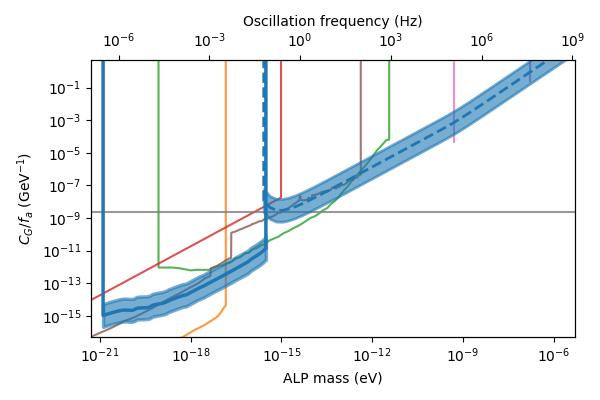

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))
ax1 = ax.twiny()
counter = 1
for kk in best_exp_bounds:
    temp_x = best_exp_bounds[kk][0]
    temp_y = best_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1:
        counter += 1
for kk in worse_exp_bounds:
    temp_x = worse_exp_bounds[kk][0]
    temp_y = worse_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
for kk in narrowband_exp_bounds:
    temp_x = narrowband_exp_bounds[kk][0]
    temp_y = narrowband_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    if counter == 7:
        ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C4")
    else:
        ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
for kk in model_indep_theory_bounds:
    temp_x = model_indep_theory_bounds[kk][0]
    temp_y = model_indep_theory_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C7")
    counter += 1
    if counter == 1:
        counter += 1
plt_bounds(ax, coherent_oscillation, color="C0", linestyle="-", linewidth=2.5)
plt_bounds(ax, stochastic_fluctuation, color="C0", linestyle="--", linewidth=2)
ax.set_ylabel("$C_G / f_a$ (GeV${}^{-1}$)")
ax.set_xlabel("ALP mass (eV)")
ax1.set_xscale("log")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.5e-16, 0.5e1)
ax.set_xticks([1e-21, 1e-18, 1e-15, 1e-12, 1e-9, 1e-6])
lower_mass_bound = 5e-22
upper_mass_bound = 5e-6
ax.set_xlim(lower_mass_bound, upper_mass_bound)
ax1.set_xlim(axion_mass_to_frequency(lower_mass_bound), axion_mass_to_frequency(upper_mass_bound))
ax1.set_xticks([1e-6, 1e-3, 1, 1e3, 1e6, 1e9])
ax1.set_xlabel("Oscillation frequency (Hz)")
#ax.legend()
plt.tight_layout()
plt.savefig("exclusion.pdf")
plt.show()

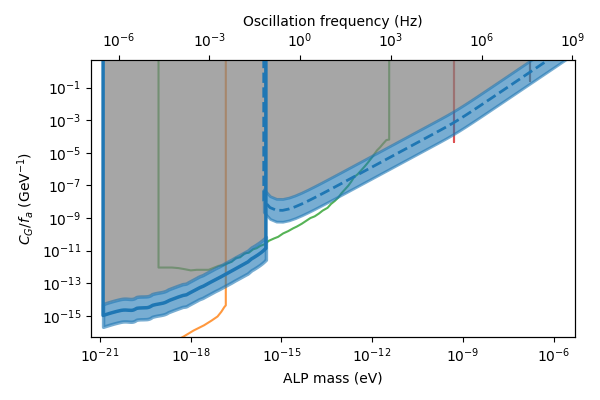

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
ax1 = ax.twiny()
counter = 1
for kk in best_exp_bounds:
    temp_x = best_exp_bounds[kk][0]
    temp_y = best_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1:
        counter += 1
for kk in narrowband_exp_bounds:
    temp_x = narrowband_exp_bounds[kk][0]
    temp_y = narrowband_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    if counter == 7:
        ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C4")
    else:
        ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
plt_bounds(ax, coherent_oscillation, color="C0", linestyle="-", linewidth=2.5)
fill_above(ax, coherent_oscillation, color="gray", linestyle="-", linewidth=0, alpha=0.7)
plt_bounds(ax, stochastic_fluctuation, color="C0", linestyle="--", linewidth=2)
fill_above(ax, stochastic_fluctuation, color="gray", linestyle="-", linewidth=0, alpha=0.7)
ax.set_ylabel("$C_G / f_a$ (GeV${}^{-1}$)")
ax.set_xlabel("ALP mass (eV)")
ax1.set_xscale("log")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.5e-16, 0.5e1)
ax.set_xticks([1e-21, 1e-18, 1e-15, 1e-12, 1e-9, 1e-6])
lower_mass_bound = 5e-22
upper_mass_bound = 5e-6
ax.set_xlim(lower_mass_bound, upper_mass_bound)
ax1.set_xlim(axion_mass_to_frequency(lower_mass_bound), axion_mass_to_frequency(upper_mass_bound))
ax1.set_xticks([1e-6, 1e-3, 1, 1e3, 1e6, 1e9])
ax1.set_xlabel("Oscillation frequency (Hz)")
#ax.legend()
plt.tight_layout()
plt.savefig("exclusion.pdf")
plt.show()

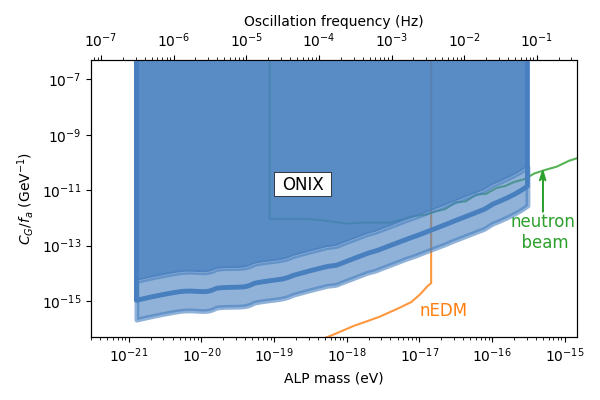

In [117]:
fig, ax = plt.subplots(figsize=(6, 4))
ax1 = ax.twiny()
counter = 1
for kk in best_exp_bounds:
    temp_x = best_exp_bounds[kk][0]
    temp_y = best_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1:
        counter += 1
for kk in worse_exp_bounds:
    if kk == "HfF$^+$" or kk == "clocks":
        continue
    temp_x = worse_exp_bounds[kk][0]
    temp_y = worse_exp_bounds[kk][1]
    temp_x = np.append([temp_x[0]], temp_x)
    temp_y = np.append([1e10], temp_y)
    temp_x = np.append(temp_x, [temp_x[-1]])
    temp_y = np.append(temp_y, [1e10])
    ax.plot(temp_x, temp_y, label=kk, alpha=0.8, zorder=counter, color=f"C{counter}")
    counter += 1
    if counter == 1 or counter == 4:
        counter += 1
plt_bounds(ax, coherent_oscillation, color="#477fbf", linestyle="-", linewidth=3.5)
fill_above(ax, coherent_oscillation, color="#477fbf", linestyle="-", linewidth=0, alpha=0.9)
ax.set_ylabel("$C_G / f_a$ (GeV${}^{-1}$)")
ax.set_xlabel("ALP mass (eV)")
ax1.set_xscale("log")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.5e-16, 5e-7)
#ax.set_xticks([1e-21, 1e-18, 1e-15, 1e-12, 1e-9, 1e-6])
lower_mass_bound = 3e-22
upper_mass_bound = 1.5e-15
ax.set_xlim(lower_mass_bound, upper_mass_bound)
ax1.set_xlim(axion_mass_to_frequency(lower_mass_bound), axion_mass_to_frequency(upper_mass_bound))
#ax1.set_xticks([1e-6, 1e-3])
ax1.set_xlabel("Oscillation frequency (Hz)")
ax.text(1e-17, 0.3e-15, "nEDM", color="C1", fontsize=12)
ax.text(0.18e-15, 8e-14, "neutron\n  beam", color="C2", fontsize=12)
ax.arrow(0.5e-15, 16e-13, 0, 2e-11, color="C2", width=1e-18, head_length=3e-11, head_width=1e-16, overhang=0.2)
ax.fill_between([1e-19, 0.6e-18], 6e-12, 4.5e-11, zorder=150, color="white", linewidth=0.5, edgecolor="black")
ax.text(1.27e-19, 1e-11, "ONIX", color="black", fontsize=12, zorder=200)
#ax.legend()
plt.tight_layout()
plt.savefig("exclusion.pdf")
plt.show()

In [121]:
np.savez(
    "final_plots/exclusion.npz",
    onix_masses = coherent_oscillation["masses"],
    onix_inverse_fa_geo_mean = coherent_oscillation["inverse_fa_bound_geo_mean"],
    onix_inverse_fa_Sushkov = coherent_oscillation["inverse_fa_bound_geo_mean"] * S_geo_mean / S_Sushkov,
    onix_inverse_fa_Flambaum = coherent_oscillation["inverse_fa_bound_geo_mean"] * S_geo_mean / S_Flambaum,
    nedm_masses = best_exp_bounds["nEDM"][0],
    nedm_inverse_fa = best_exp_bounds["nEDM"][1],
    neutron_beam_masses = best_exp_bounds["neutron beam"][0],
    neutron_beam_inverse_fa = best_exp_bounds["neutron beam"][1],
)